In [4]:
%matplotlib inline
import pandas as pd

In [5]:
import seaborn

In [6]:
def dateparse(x):
    
    try:
        return pd.datetime.strptime(x, '%d/%m/%Y')
    except ValueError:
        pass
    
    try:
        return pd.datetime.strptime(x, '%b-%Y')
    except ValueError:
        pass
    
    if "-" in x:
        (lhs, rhs) = x.split('-', 1)
        return dateparse(rhs)

In [11]:
all_trains = pd.read_csv('sydtrains.csv',
                          index_col=1,
                          parse_dates=['SURVEY_DATE_USED'],
                          date_parser=dateparse,
                          thousands=","
                          )
trains = all_trains[all_trains.YEAR == 2014].copy()
trains

,LINE,YEAR,SURVEY_DATE_USED,WHETHER_SURVEYED,IN_0200_0600,OUT_0200_0600,IN_0600_0930,OUT_0600_0930,IN_0930_1500,OUT_0930_1500,IN_1500_1830,OUT_1500_1830,IN_1830_0200,OUT_1830_0200,IN_24_HOURS,OUT_24_HOURS,RANK,STATION_SORT_ID
STATION,,,,,,,,,,,,,,,,,,
Central,CBD,2014,2014-05-06,Yes,940,920,10390,42070,21400,30150,45370,16270,19010,7700,97110,97110,1,101
Town Hall,CBD,2014,2014-05-07,Yes,880,880,6380,43210,16930,23550,43670,15270,21760,6720,89620,89620,2,102
Wynyard,CBD,2014,2014-05-20,Yes,590,570,4710,39620,9200,11180,35010,6510,10690,2330,60200,60200,3,103
Parramatta,Western,2014,2014-11-19,Yes,660,330,7790,13700,7400,7020,14960,8660,4150,5260,34960,34960,4,905
North Sydney,North Shore,2014,2014-08-19,Yes,270,270,2340,18340,4450,5590,17760,3050,3790,1360,28610,28610,5,1402
Redfern,CBD,2014,2014-05-01,Yes,250,250,3910,10690,5350,8170,12510,4250,3660,2320,25680,25680,6,108
Chatswood,North Shore,2014,2014-08-19,Yes,210,200,5030,8200,4710,4930,9430,6000,2820,2860,22200,22200,7,1407
Bondi Junction,Eastern Suburbs,2014,2014-09-02,Yes,210,210,10150,4350,4370,4600,5240,8330,1910,4380,21880,21880,8,203
Strathfield,Inner West,2014,2014-09-09,Yes,190,190,7900,4050,4980,3950,5540,7230,2100,5280,20710,20710,9,1110


## Kernal density distribution re the line below

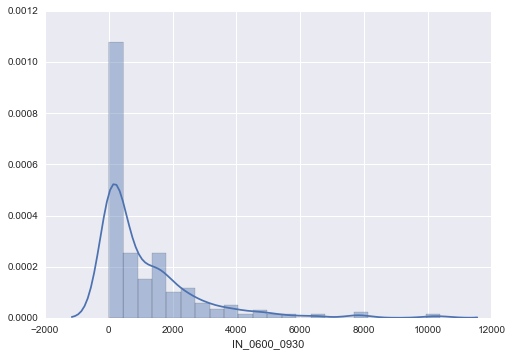

In [12]:
seaborn.distplot(trains.IN_0600_0930)

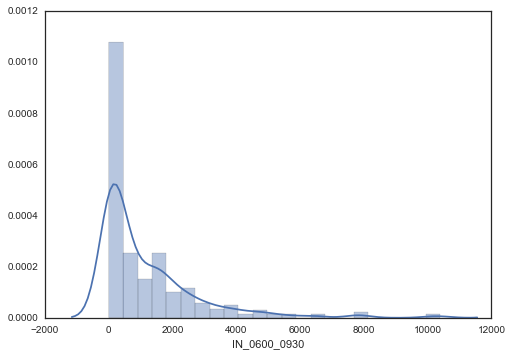

In [13]:
with seaborn.axes_style("white"):
    seaborn.distplot(trains.IN_0600_0930)

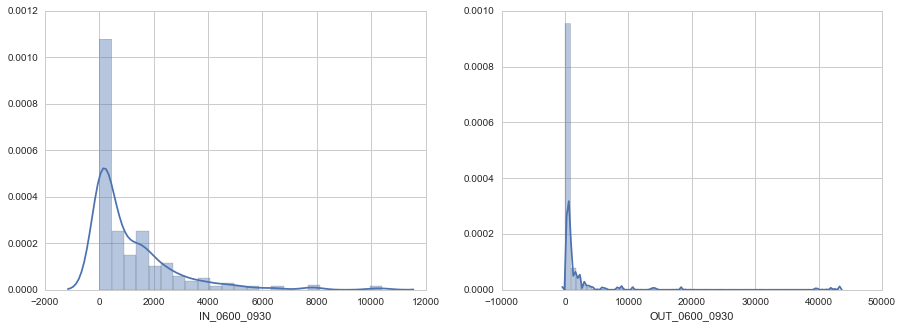

In [89]:
import matplotlib.pyplot as plt
with seaborn.axes_style("whitegrid"):
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    seaborn.distplot(trains.IN_0600_0930, ax=axes[0])
    seaborn.distplot(trains.OUT_0600_0930, ax=axes[1])
fig, axes

plt.show()

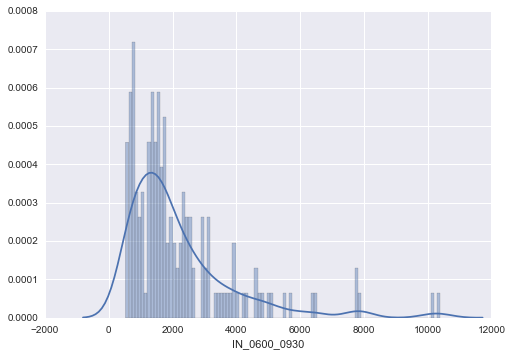

In [33]:
seaborn.distplot(trains.IN_0600_0930[trains.IN_0600_0930 > 500], bins=100)

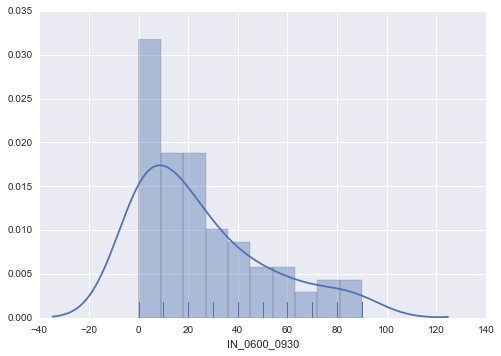

In [36]:
seaborn.distplot(trains.IN_0600_0930[trains.IN_0600_0930 < 100], bins=10, rug=True)

## Bivariate Analysis

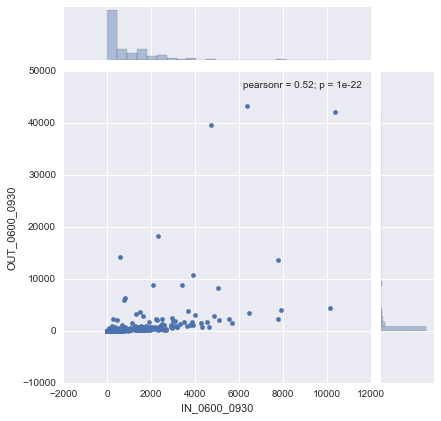

In [37]:
seaborn.jointplot(x="IN_0600_0930", y="OUT_0600_0930", data=trains)

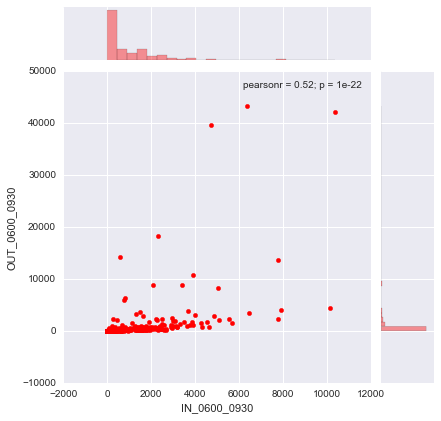

In [39]:
seaborn.jointplot(x="IN_0600_0930", y="OUT_0600_0930", data=trains, color="red")

In [40]:
trains.LINE.unique()

array(['CBD', 'Western', 'North Shore', 'Eastern Suburbs', 'Inner West',
       'Illawarra', 'South', 'Northern via Strathfield',
       'Northern via Macquarie Park', 'Bankstown', 'Airport', 'East Hills',
       'Central Coast', 'Olympic Park', 'South Coast', 'Blue Mountains',
       'Newcastle', 'Hunter', 'Carlingford', 'Southern Highlands'], dtype=object)

In [51]:
def line_coloring(x):
    if x == 'CBD': return 'red'
    if x == 'Western': return 'orange'
    if x == 'North Shore': return 'blue'
    if x == 'Eastern Suburbs': return 'violet'
    return 'green'
train_colors = trains.LINE.map(line_coloring)

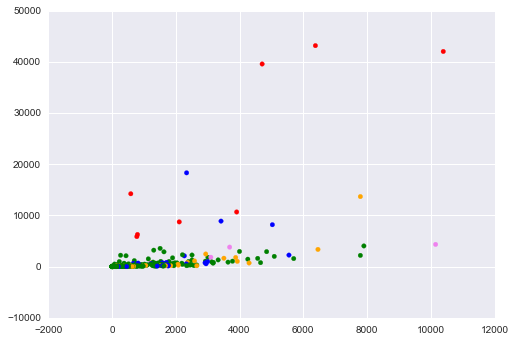

In [52]:
plt.scatter(trains.IN_0600_0930,
            trains.OUT_0600_0930,
            color=train_colors)

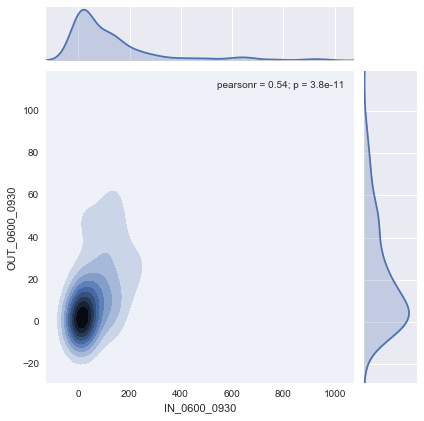

In [84]:
seaborn.jointplot(x="IN_0600_0930", y="OUT_0600_0930", kind="kde", 
                  data=trains[(trains.IN_0200_0600 < 100) & (trains.OUT_0600_0930 < 100)])

In [118]:
trains.LINE

STATION
Central                                             CBD
Town Hall                                           CBD
Wynyard                                             CBD
Parramatta                                      Western
North Sydney                                North Shore
Redfern                                             CBD
Chatswood                                   North Shore
Bondi Junction                          Eastern Suburbs
Strathfield                                  Inner West
Circular Quay                                       CBD
Martin Place                                        CBD
Hurstville                                    Illawarra
St Leonards                                 North Shore
Blacktown                                       Western
Burwood                                      Inner West
Kings Cross                             Eastern Suburbs
Hornsby                                     North Shore
Ashfield                                

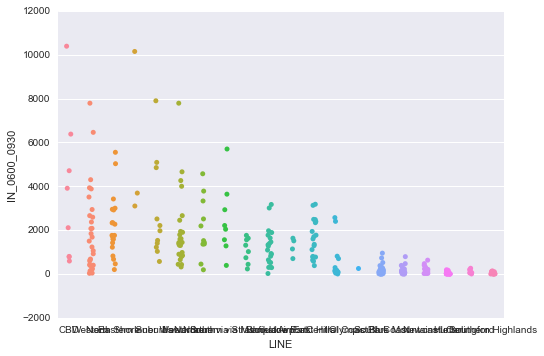

In [117]:
seaborn.stripplot(x="LINE", y="IN_0600_0930", data=trains, jitter=True)

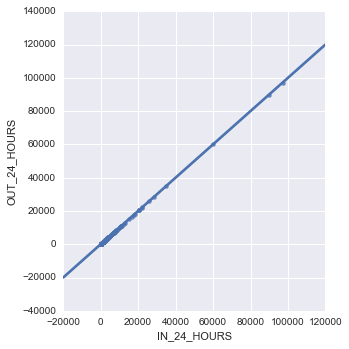

In [147]:
seaborn.lmplot(x="IN_24_HOURS", y="OUT_24_HOURS", data=trains)

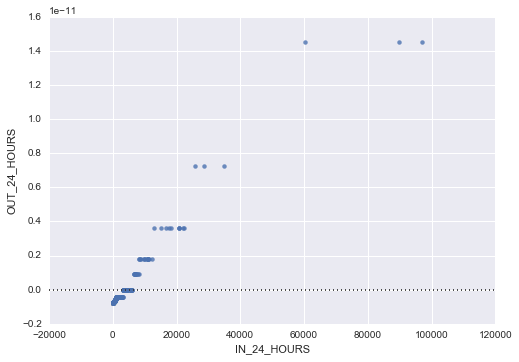

In [148]:
seaborn.residplot(x="IN_24_HOURS", y="OUT_24_HOURS", data=trains)

## Diabetes

In [56]:
import sklearn.datasets
db = sklearn.datasets.load_diabetes()

In [58]:
db.data.shape

(442, 10)

In [60]:
type(db.data)

numpy.ndarray

In [62]:
db.data[:,0].shape

(442,)

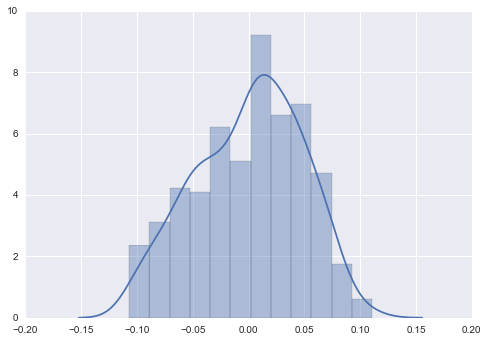

In [63]:
seaborn.distplot(db.data[:,0])

In [75]:
db_df = pd.DataFrame(
    data = {
        'Age': db.data[:,0],
        'Sex': db.data[:,1],
        'BMI': db.data[:,2],
        'Blood Pressure': db.data[:,3],
        'B1': db.data[:,4],
        'B2': db.data[:,5],
        'B3': db.data[:,6],
        'B4': db.data[:,7],
        'B5': db.data[:,8],
        'B6': db.data[:,9],
        'Progression': db.target
    }
)

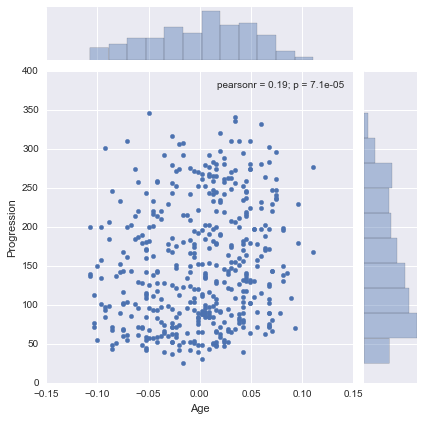

In [77]:
seaborn.jointplot(x="Age", y="Progression", data=db_df)

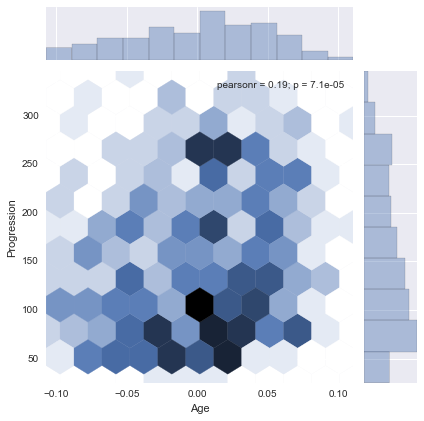

In [78]:
seaborn.jointplot(x="Age", y="Progression", kind="hex", data=db_df)

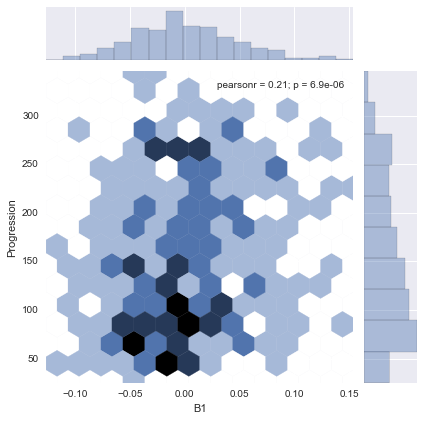

In [81]:
seaborn.jointplot(x="B1", y="Progression", kind="hex", data=db_df, bins=5)

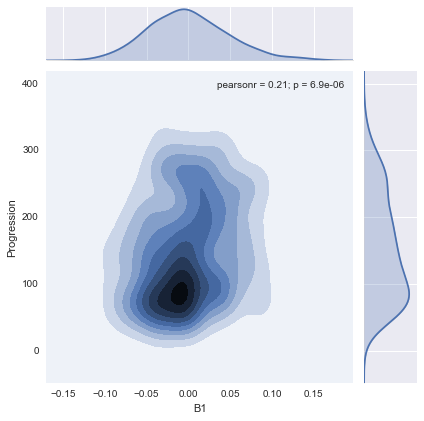

In [97]:
seaborn.jointplot(x="B1", y="Progression", kind="kde", data=db_df)

In [87]:
col = [x for x in db_df.columns if x != "Progression"]

In [86]:
answer = []
for x in db_df.columns:
    if x != "Progression":
        answer.append(x)
answer

['Age', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'BMI', 'Blood Pressure', 'Sex']

### The two loops above result in the same thing! Note below uses "col"

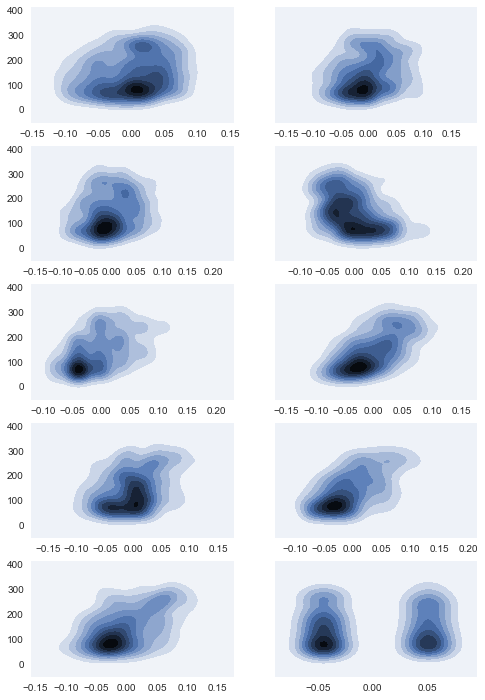

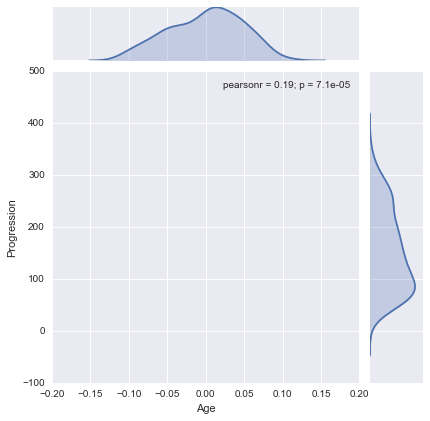

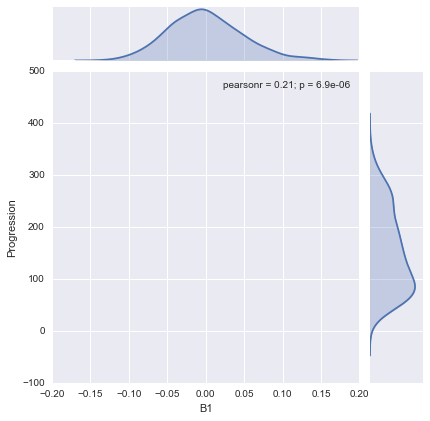

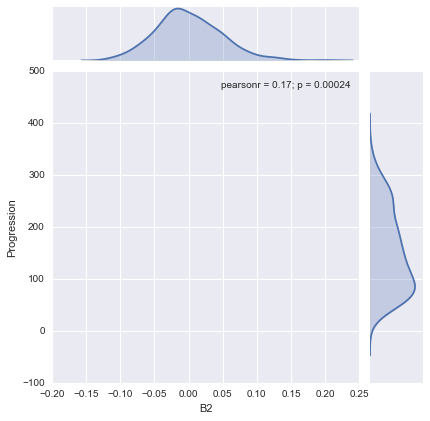

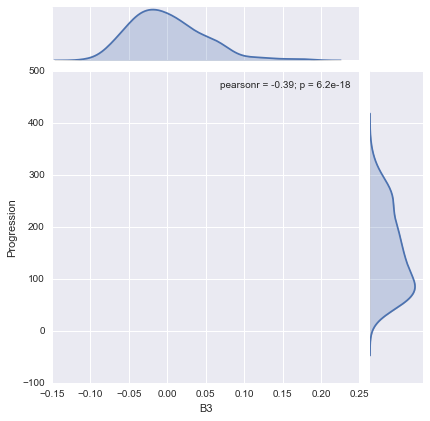

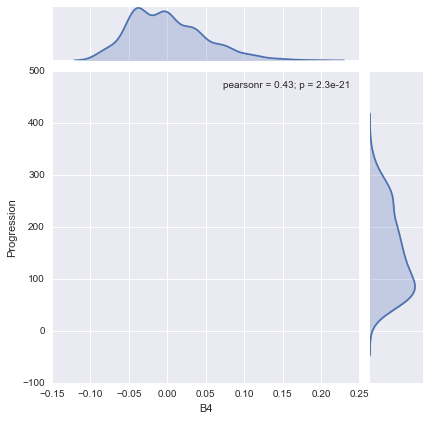

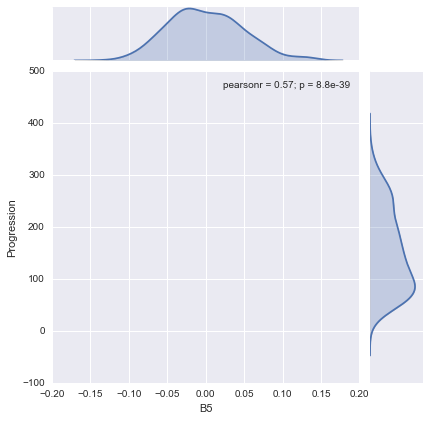

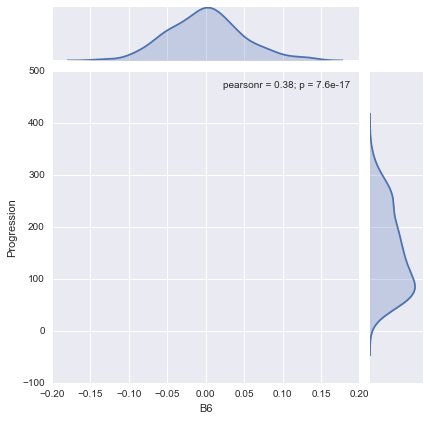

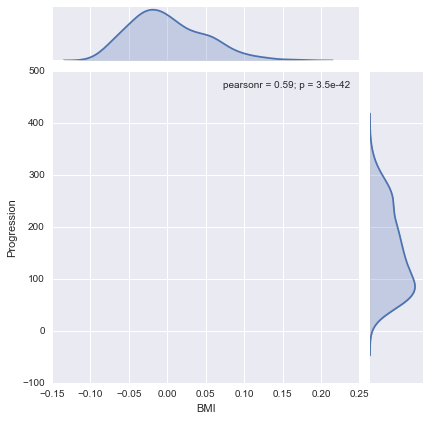

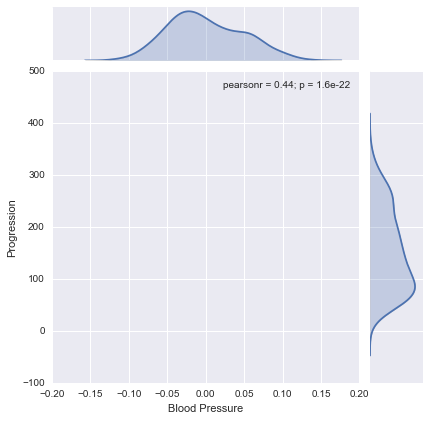

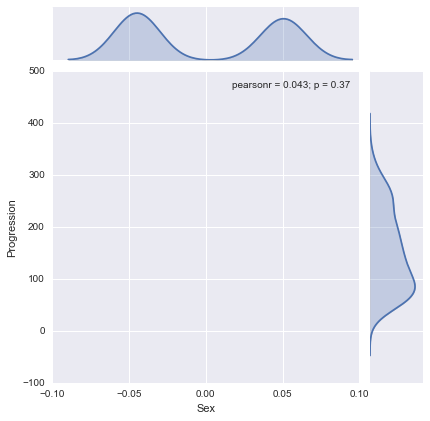

In [101]:
(fig, axes) = plt.subplots(5, 2, sharey=True, figsize=(8,12))
for (c,a) in zip(col,axes.flatten()):
    seaborn.jointplot(x=c, y="Progression", kind="kde", data=db_df, ax=a)

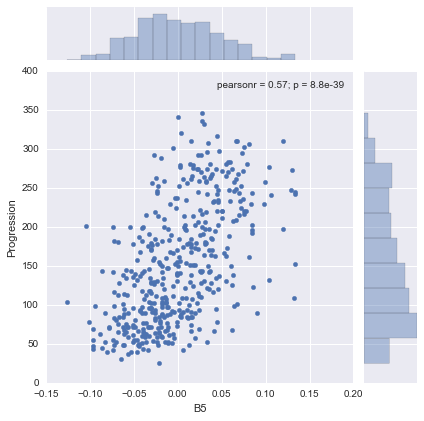

In [102]:
seaborn.jointplot(x="B5", y="Progression", data=db_df)

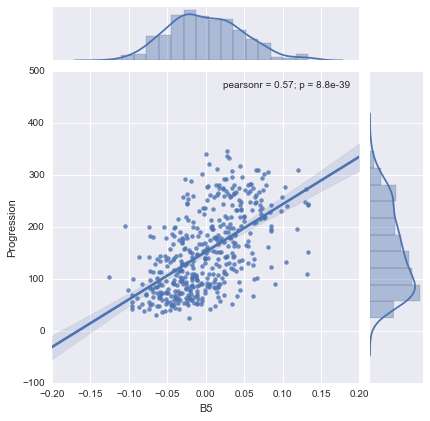

In [103]:
seaborn.jointplot(x="B5", y="Progression", data=db_df, kind="reg")

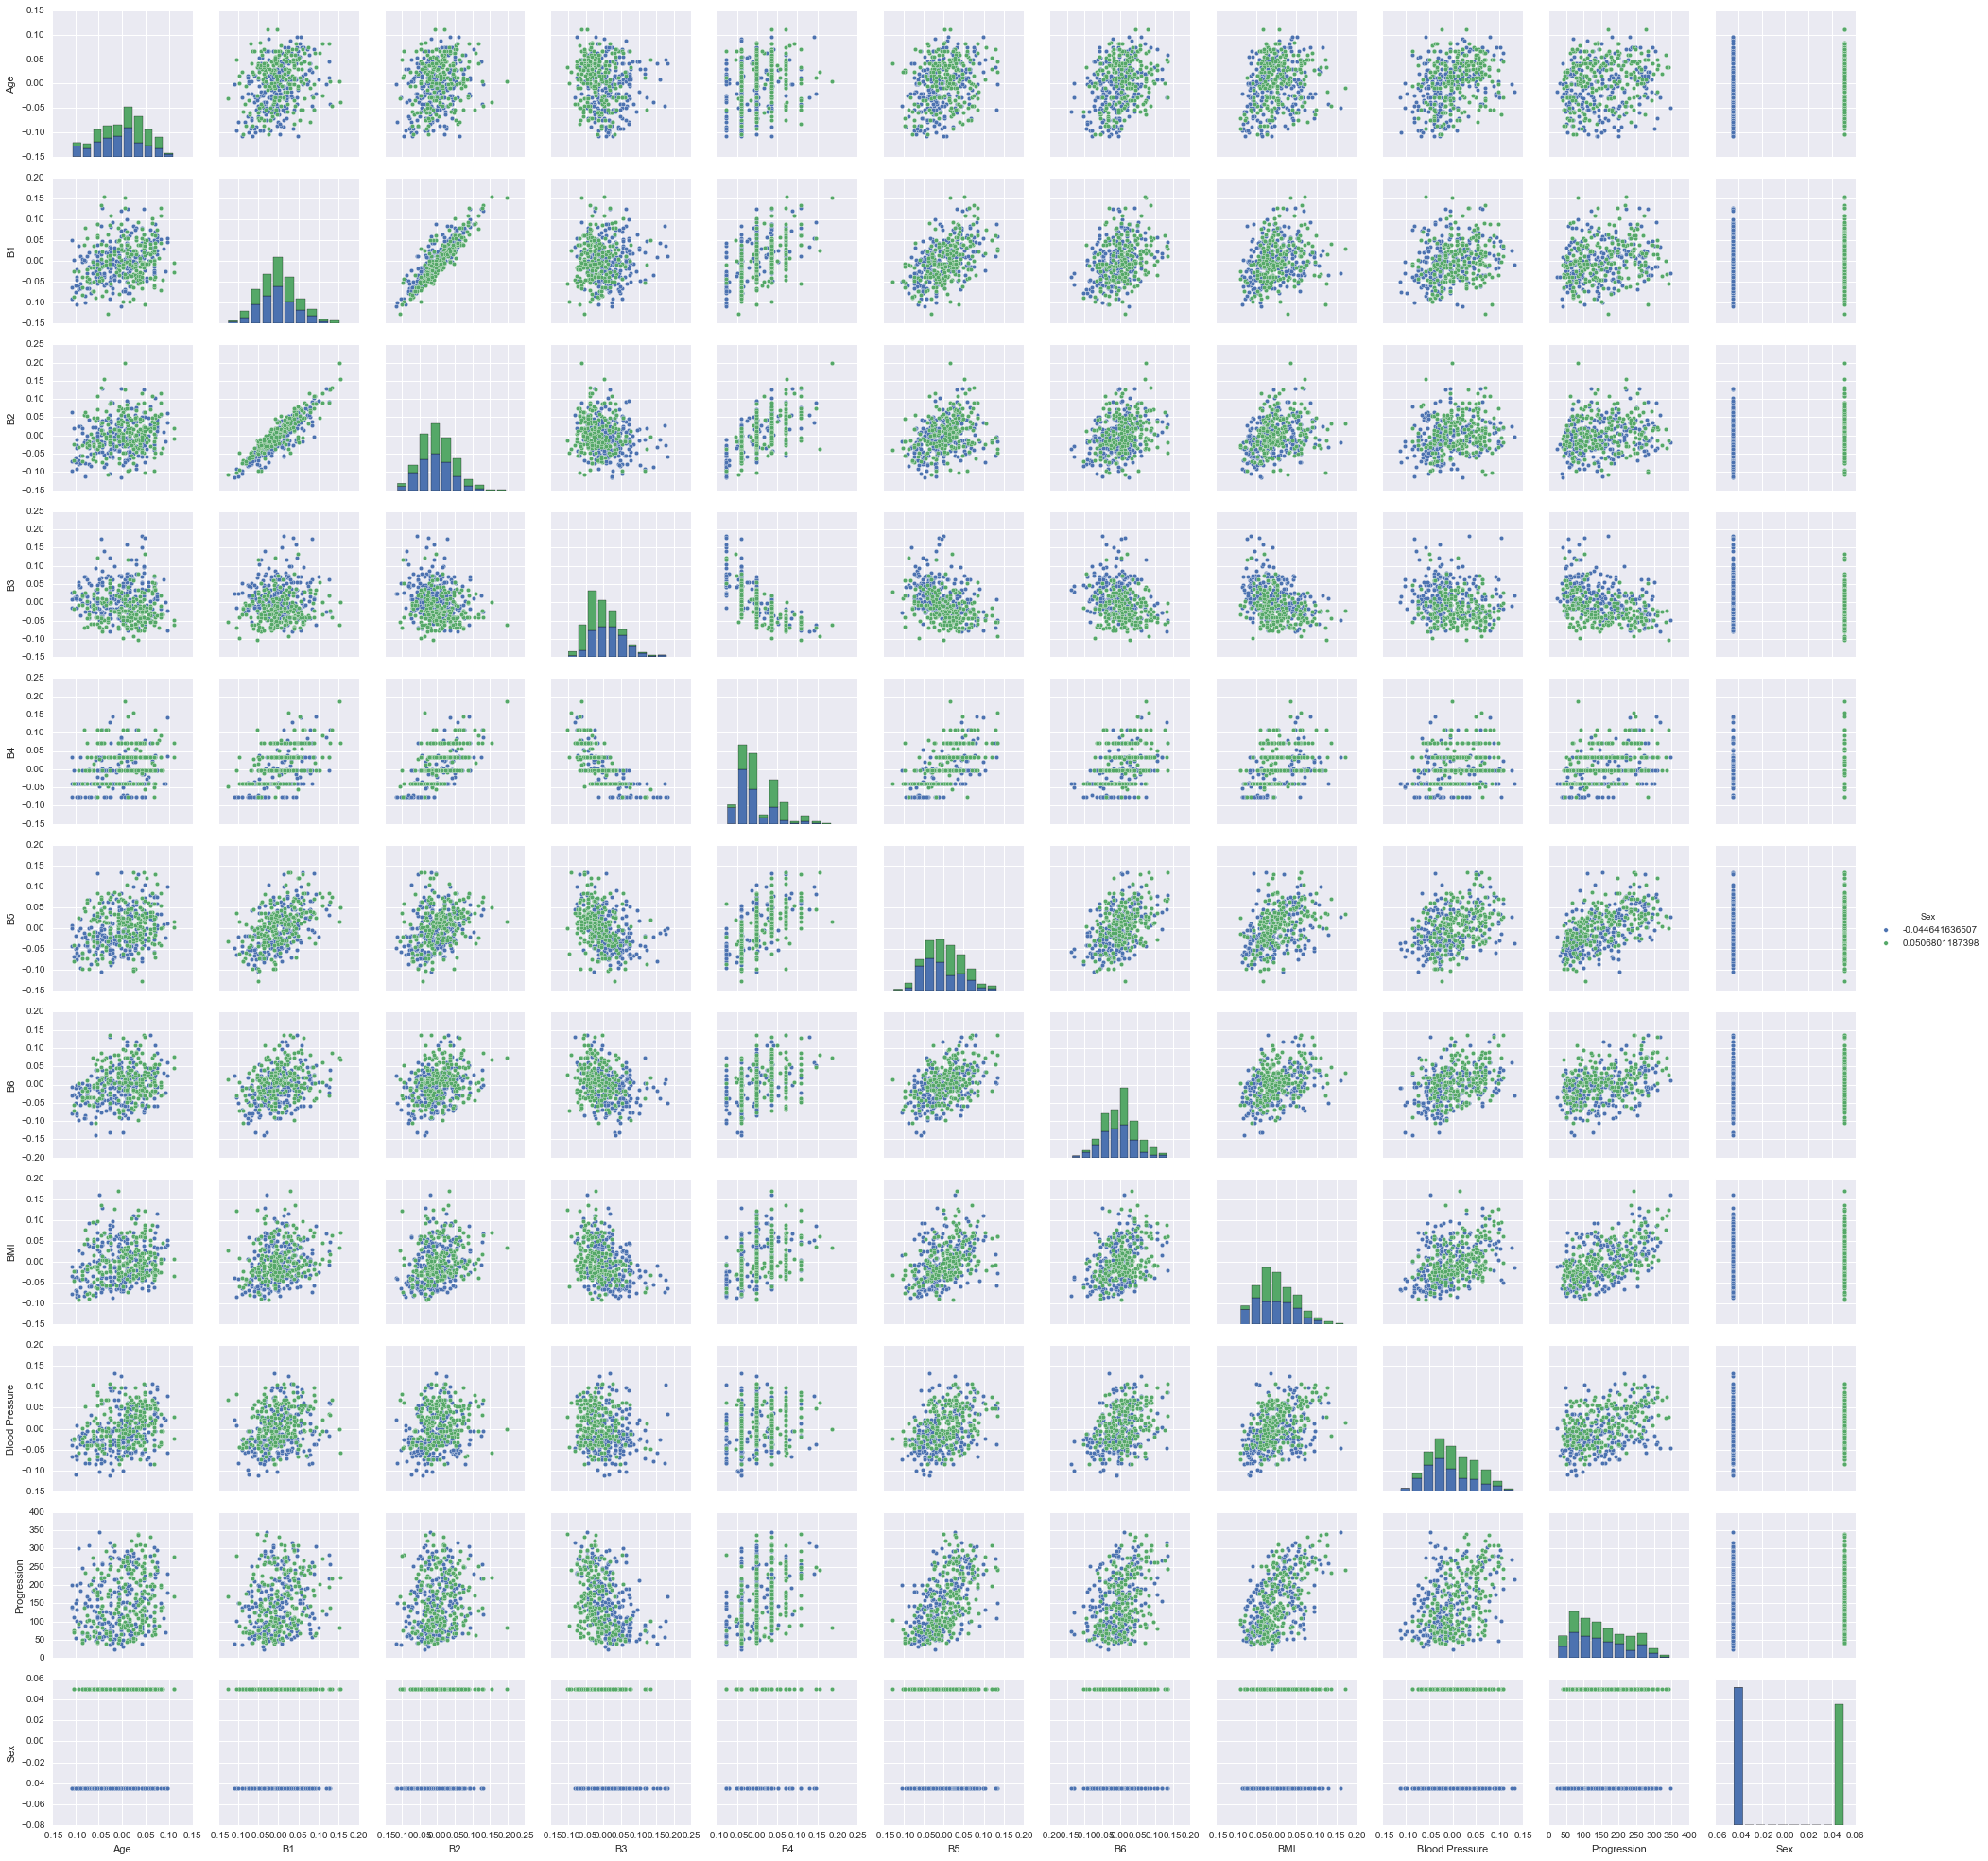

In [109]:
seaborn.pairplot(data=db_df, hue="Sex")

## Categorical

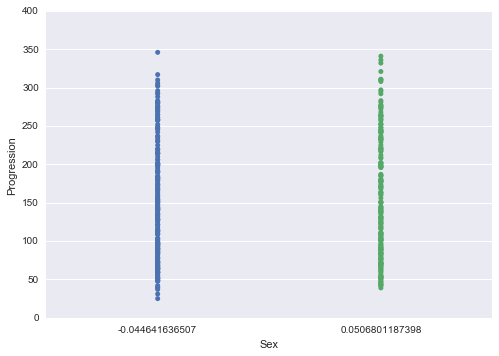

In [110]:
seaborn.stripplot(x="Sex", y="Progression", data=db_df)

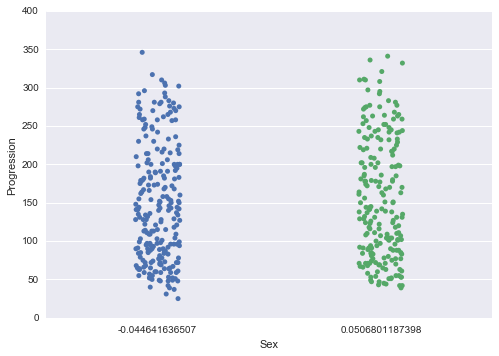

In [111]:
seaborn.stripplot(x="Sex", y="Progression", data=db_df, jitter=True)

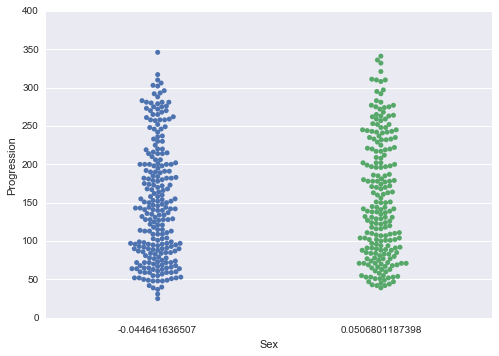

In [112]:
seaborn.swarmplot(x="Sex", y="Progression", data=db_df)

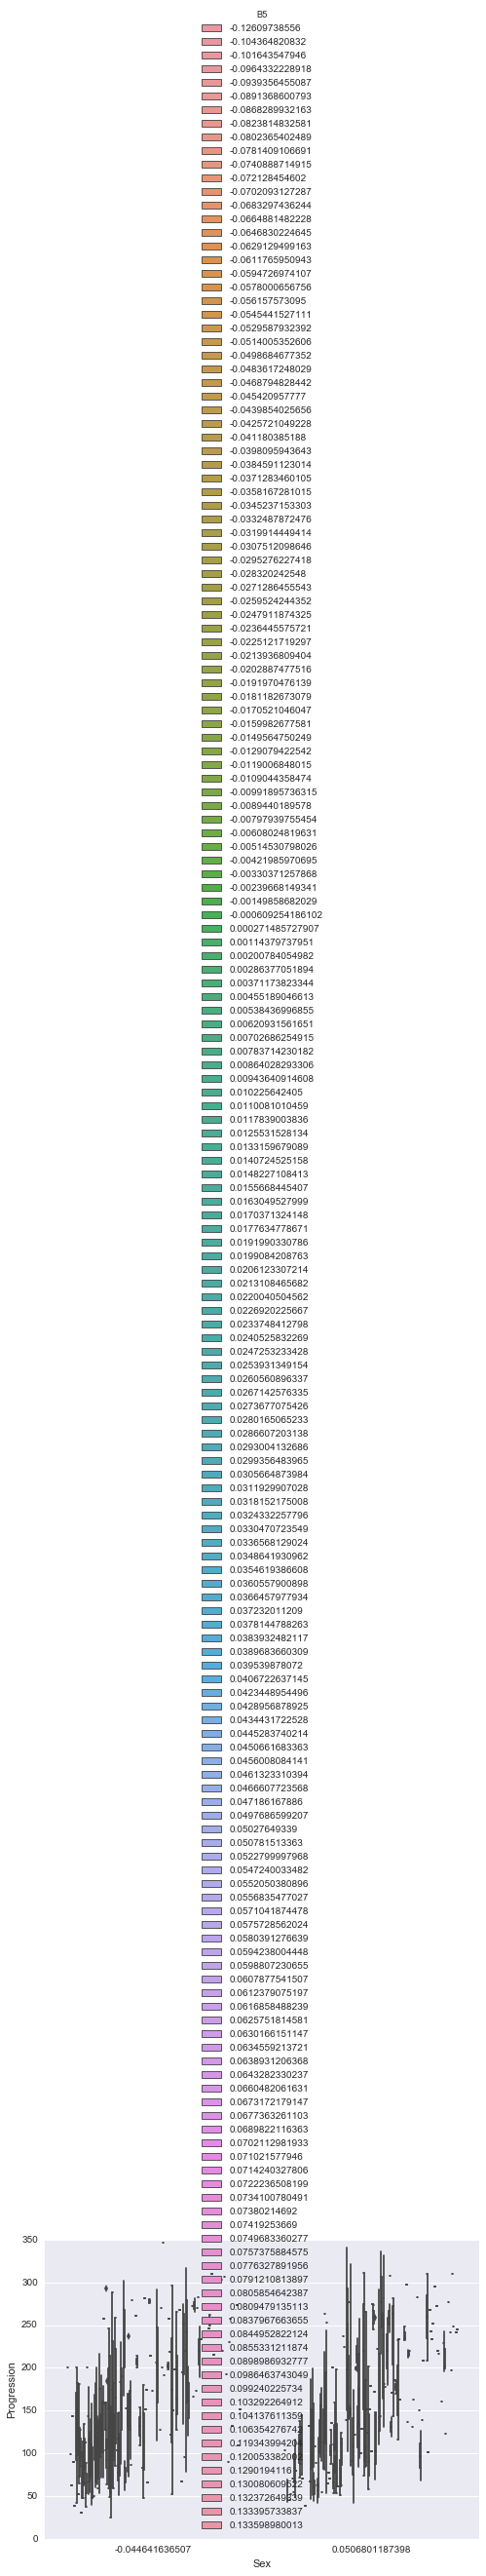

In [120]:
seaborn.boxplot(x="Sex", y="Progression", data=db_df, hue="B5")

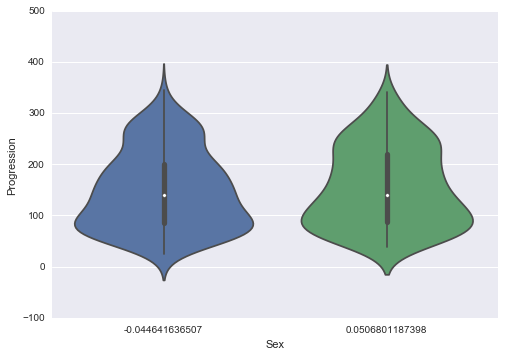

In [127]:
seaborn.violinplot(x="Sex", y="Progression", data=db_df)

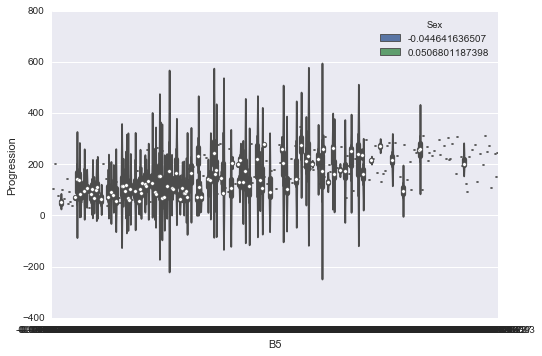

In [128]:
seaborn.violinplot(x="B5", y="Progression", data=db_df, hue="Sex")

In [129]:
db_df['High_B5'] = db_df.B5 > 0

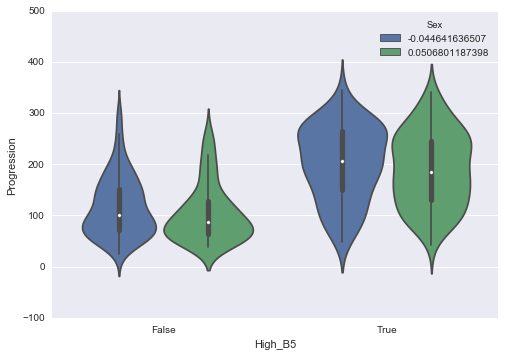

In [130]:
seaborn.violinplot(x="High_B5", y="Progression", data=db_df, hue="Sex")

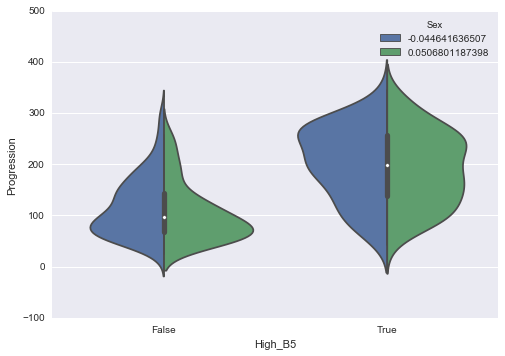

In [131]:
seaborn.violinplot(x="High_B5", y="Progression", data=db_df, hue="Sex", split=True)

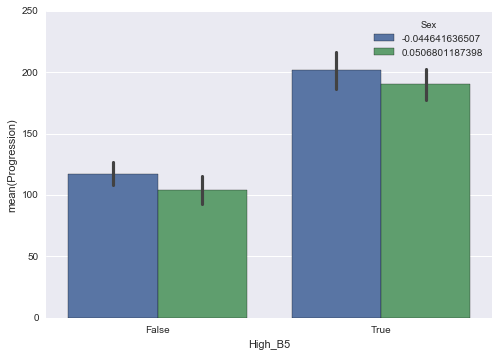

In [132]:
seaborn.barplot(x="High_B5", y="Progression", data=db_df, hue="Sex")

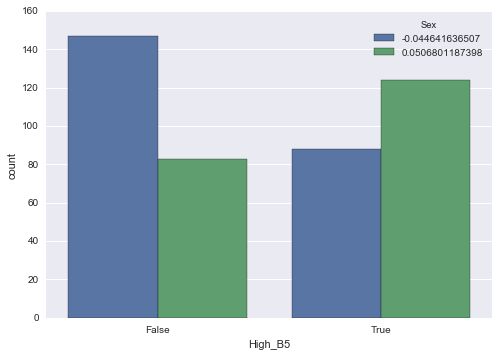

In [134]:
seaborn.countplot(x="High_B5", data=db_df, hue="Sex")

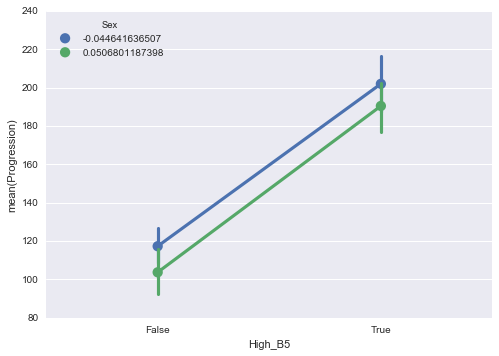

In [136]:
seaborn.pointplot(x="High_B5", y="Progression", data=db_df, hue="Sex")

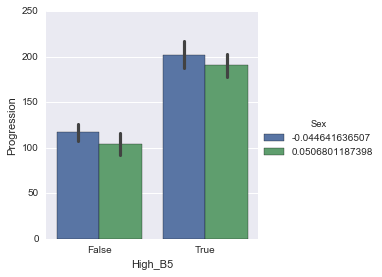

In [137]:
seaborn.factorplot(x="High_B5", y="Progression", data=db_df, hue="Sex", kind="bar")

## Linear Relationships

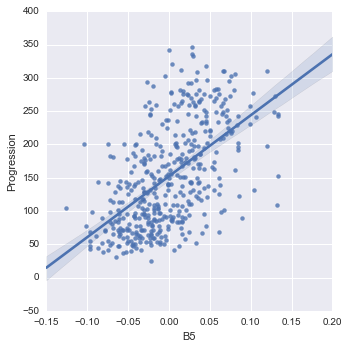

In [138]:
seaborn.lmplot(x="B5", y="Progression", data=db_df)

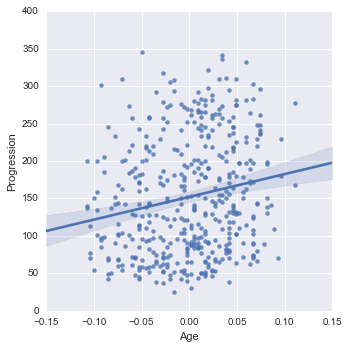

In [139]:
seaborn.lmplot(x="Age", y="Progression", data=db_df)

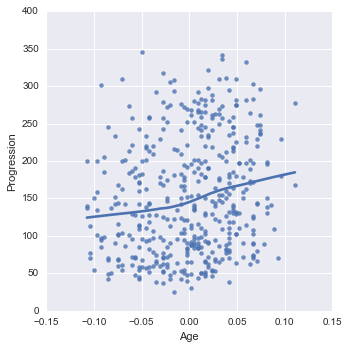

In [142]:
seaborn.lmplot(x="Age", y="Progression", data=db_df, lowess=True)

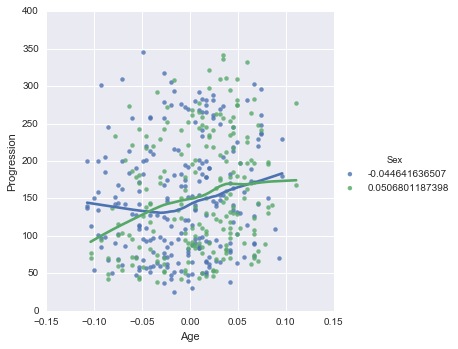

In [144]:
seaborn.lmplot(x="Age", y="Progression", data=db_df, lowess=True, hue="Sex")

### Residual Plot is valuable because you can see the noise

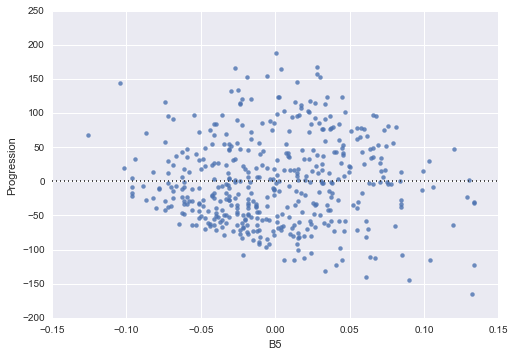

In [146]:
seaborn.residplot(x="B5", y="Progression", data=db_df)